In [1]:
import numpy as np
import mrcfile
from matplotlib import pyplot as plt
import collections
from ClassFiles.ut import l2
from continue_em import continueEM, startingZeros
#from one_step_EM import oneStepEM
from ClassFiles.ut import locate_gt, rfft, irfft, unify_form, Rescaler

In [2]:
START_ITER = 2
STOP_ITER = 3

#base_path = '/local/scratch/public/sl767/MRC_Data/Data_002_10k/EM/'
#path=base_path+'Refine3D/1H12/1H12_mult002_it007_half2_class001_external_reconstruct.star'
#path=base_path+'Refine3D/1H12/1H12_mult005_it001_half1_class001_external_reconstruct.star'
#path=base_path+'3PE7/3PE7_mult002_it007_half1_class001_external_reconstruct.star'
# sgd_path='/local/scratch/public/sl767/MRC_Data/Data_002_10k/SGD/1O20/1O20_mult002_it300_class001.mrc'

pdb = '9ICA'
ground_truth_path=locate_gt(pdb)
with mrcfile.open(ground_truth_path) as mrc:
   ground_truth = mrc.data

In [3]:
# REDEFINE NAIVE RECOS WITHOUT EXT RECONSTRUCT TO AVOID NEGATIVE VALUES :-) 
with mrcfile.open('/local/scratch/public/sl767/MRC_Data/Data_002_10k/EM/9ICA/9ICA_mult002_it{}_half1_class001.mrc'.format(startingZeros(START_ITER))) as mrc:
    naive_recon = mrc.data 
with mrcfile.open('/local/scratch/public/sl767/MRC_Data/Data_002_10k/EM/9ICA/9ICA_mult002_it{}_half1_class001.mrc'.format(startingZeros(STOP_ITER))) as mrc:
    naive_recon2 = mrc.data 

Build visualization tool

In [4]:
def vis(data, fourier=True):
    if fourier:
        data = irfft(data)
    #plt.imshow(im[...,45])
    plt.imshow(np.mean(data.squeeze(), axis=-1))

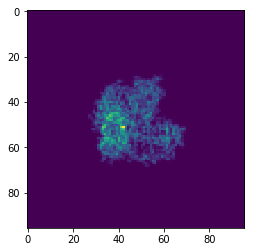

In [5]:
plt.figure(figsize=(15,4))
vis(ground_truth, fourier=False)

In [6]:
new_fsc, new_as, new_path_oneEM = continueEM(naive_recon, pdb, START_ITER, STOP_ITER)
with mrcfile.open(new_path_oneEM) as mrc:
    new_naive_recon = mrc.data 

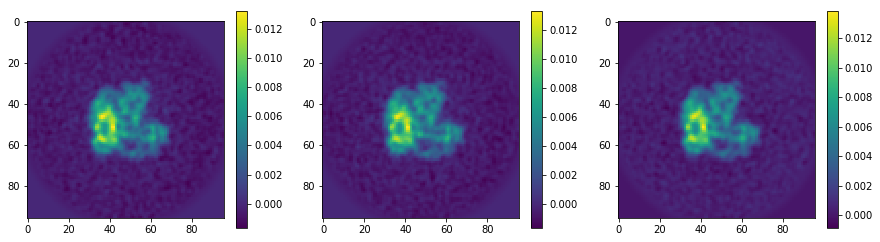

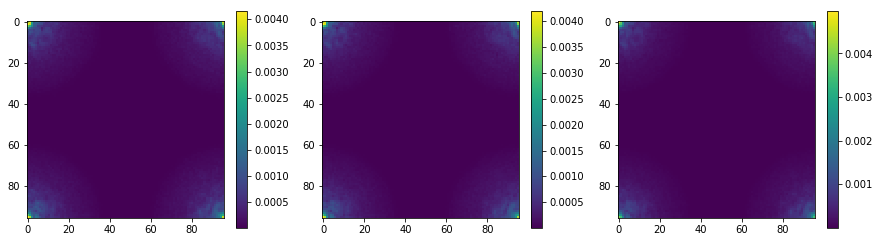

In [7]:
plt.figure(figsize=(15, 4))
plt.subplot(131)
vis(new_naive_recon, fourier=False)
plt.colorbar()
plt.subplot(132)
vis(naive_recon2, fourier=False)
plt.colorbar()
plt.subplot(133)
vis(naive_recon, fourier=False)
plt.colorbar()

plt.figure(figsize=(15, 4))
plt.subplot(131)
vis(np.abs(rfft(new_naive_recon)), fourier=False)
plt.colorbar()
plt.subplot(132)
vis(np.abs(rfft(naive_recon2)), fourier=False)
plt.colorbar()
plt.subplot(133)
vis(np.abs(rfft(naive_recon)), fourier=False)
plt.colorbar()

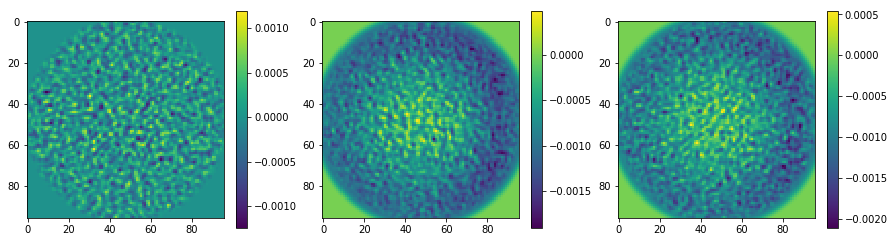

In [8]:
plt.figure(figsize=(15, 4))
plt.subplot(131)
vis(new_naive_recon-naive_recon2, fourier=False)
plt.colorbar()
plt.subplot(132)
vis(new_naive_recon-naive_recon, fourier=False)
plt.colorbar()
plt.subplot(133)
vis(naive_recon2-naive_recon, fourier=False)
plt.colorbar()

0.631256


In [3]:
#with mrcfile.open('/local/scratch/public/sl767/MRC_Data/Data_002_10k/EM/3PE7/3PE7_mult002_it010_half1_class001.mrc') as mrc:
#    tmp1 = mrc.data 

In [4]:
#with mrcfile.open('/local/scratch/public/sl767/MRC_Data/Data_002_10k/EM/3PE7/3PE7_mult002_it010_half1_class001_external_reconstruct.mrc') as mrc:
#    tmp2 = mrc.data 

In [17]:
#plt.figure(figsize=(15, 4))
#plt.subplot(131)
#vis(tmp1, fourier=False)
#plt.colorbar()
#plt.subplot(132)
#vis(tmp2, fourier=False)
#plt.colorbar()
#plt.subplot(133)
#vis(tmp1-tmp2, fourier=False)
#plt.colorbar()

In [18]:
#plt.plot((tmp1-tmp2)[45,0,:])